In [46]:
import pandas as pd
import pandas_datareader as data 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import math
import statistics
import datetime
import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew
%matplotlib inline


In [88]:
start = '2018-1-1'
end = datetime.date.today()

dfbtc = data.DataReader('BTC-USD', data_source='yahoo', start= start, end= end)
print(dfbtc['Adj Close'])

dfsp = data.DataReader("^GSPC", data_source='yahoo', start= start, end= end)
print(dfsp['Adj Close'])

Date
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
2018-01-05    17429.500000
                  ...     
2020-08-19    11878.372070
2020-08-20    11592.489258
2020-08-21    11681.825195
2020-08-22    11664.847656
2020-08-25    11769.646484
Name: Adj Close, Length: 966, dtype: float64
Date
2018-01-02    2695.810059
2018-01-03    2713.060059
2018-01-04    2723.989990
2018-01-05    2743.149902
2018-01-08    2747.709961
                 ...     
2020-08-18    3389.780029
2020-08-19    3374.850098
2020-08-20    3385.510010
2020-08-21    3397.159912
2020-08-24    3431.280029
Name: Adj Close, Length: 666, dtype: float64


Date
2018-01-07    15839.085658
2018-01-14    14322.485631
2018-01-21    12011.500000
2018-01-28    11259.571708
2018-02-04     9582.429967
                  ...     
2020-08-02    11215.361049
2020-08-09    11739.360840
2020-08-16    11794.481864
2020-08-23    11761.175130
2020-08-30    11769.646484
Freq: W-SUN, Name: Adj Close, Length: 139, dtype: float64
Date
2018-01-07    2719.002502
2018-01-14    2760.206006
2018-01-21    2796.827515
2018-01-28    2844.352002
2018-02-04    2816.775977
                 ...     
2020-08-02    3246.725977
2020-08-09    3325.866016
2020-08-16    3364.158008
2020-08-23    3385.858008
2020-08-30    3431.280029
Freq: W-SUN, Name: Adj Close, Length: 139, dtype: float64


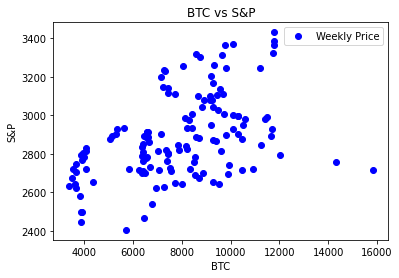

In [120]:
# Weekly Data
weekly_summarybtc = dfbtc['Adj Close'].resample('W').mean()
weekly_summarysp = dfsp['Adj Close'].resample('W').mean()
print(weekly_summarybtc)
print(weekly_summarysp)

# Plot
plt.plot(weekly_summarybtc, weekly_summarysp, 'o', color='blue', label = 'Weekly Price')

plt.title('BTC vs S&P')
plt.xlabel('BTC')
plt.ylabel('S&P')
plt.legend()
plt.show()

In [111]:
df = pd.DataFrame({"Price BTC": weekly_summarybtc,  "Price S&P": weekly_summarysp})
corr = df.corr()
print(corr)

Price BTC  Price S&P
Price BTC   1.000000   0.471579
Price S&P   0.471579   1.000000


In [112]:
# statistical summary
df.describe()

,Price BTC,Price S&P
count,139.000000,139.000000
mean,7873.157520,2888.355713
std,2417.118810,216.743462
min,3351.422468,2405.545947
25%,6436.802944,2722.456006
50%,8012.144392,2862.700000
75%,9499.656878,3004.884009
max,15839.085658,3431.280029


In [113]:
# Kurtosis
appl_kurtosis = kurtosis(weekly_summarybtc)
goog_kurtosis = kurtosis(weekly_summarysp)

# calculate skewness
appl_skew = skew(weekly_summarybtc)
goog_skew = skew(weekly_summarysp)

display("appl kurtosis: {:.2}".format(appl_kurtosis))
display("goog kurtosis: {:.2}".format(goog_kurtosis))

display("appl Skew: {:.2}".format(appl_skew))
display("goog skew: {:.2}".format(goog_skew))


# Kurtosis test
display('APPL')


'appl kurtosis: 0.037'

'goog kurtosis: -0.18'

'appl Skew: 0.1'

'goog skew: 0.47'

'APPL'